In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from datetime import datetime

import spacy
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from textwrap import wrap

In [ ]:
from google.colab import files
upload=files.upload()

Saving Natural_Disasters_in_India .csv to Natural_Disasters_in_India .csv


In [ ]:
df = pd.read_csv("Natural_Disasters_in_India .csv")

In [ ]:
df.drop('Unnamed: 0',axis='columns', inplace=True)

In [ ]:
df.head()

,Title,Duration,Year,Disaster_Info,Date
0,1990 Andhra Pradesh cyclone,4 May,1990,the andhra pradesh cyclone or the machilipat...,1990-05-04
1,Indian Airlines Flight 605,14 February,1990,indian airlines flight was a scheduled domest...,1990-02-14
2,1991 Uttarkashi earthquake,20 October,1991,the uttarkashi earthquake also known as the g...,1991-10-20
3,1992 India–Pakistan floods,7 September,1992,the india–pakistan floods was a deadliest flo...,1992-09-07
4,Mahamaham stampede,18 February,1992,mahamaham stampede was a disaster that occurre...,1992-02-18


In [ ]:
df.head().style.set_properties(**{"background-color": "#99DDCC","color": "black","border-color": "black"})

In [ ]:
def get_df(key_words):
    DF = pd.DataFrame(columns = df.columns)

    for index, row in df.iterrows():
        for key_word in key_words:
            words = [w.lower() for w in row['Title'].split(' ') ]
            if key_word in words:
                DF.loc[len(DF.index)] = row
            
    return DF.dropna()

In [ ]:
def get_names_dates(DF):
    dates = []
    names = []

    for name,date in zip(DF['Title'],DF['Date']):
        # one mis-valued data i.e : 2020-08–25 , change this to 2020-08-25
        if date == '2020-08–25 ': 
            date = '2020-08-25'
        dates.append(datetime.strptime(date, "%Y-%m-%d"))
        names.append(name)
    
    return names,dates

In [ ]:
month_to_num  = {'January':'01', 'February':'02', 'March':'03', 'April':'04', 'May':'05', 'June':'06', 'July':'07','August':'08','September' : '09','October' : '10','November' : '11','December' : '12'}

def plot_time_data(names,dates,Title):
    # Choose some nice levels
    levels = np.tile([-5, 5,-4,4,-3, 3, -2, 2,-1,1],
                     int(np.ceil(len(dates)/8)))[:len(dates)]

    # Create figure and plot a stem plot with the date
    fig, ax = plt.subplots(figsize=(15, 6), constrained_layout=True)
    ax.set(title = Title )

    markerline, stemline, baseline = ax.stem(dates, levels,
                                             linefmt="C0-", basefmt="k-",
                                             use_line_collection=True)

    plt.setp(markerline, mec="c", mfc="w", zorder=3)

    # Shift the markers to the baseline by replacing the y-data by zeros.
    markerline.set_ydata(np.zeros(len(dates)))

    # annotate lines
    vert = np.array(['top', 'bottom'])[(levels > 0).astype(int)]
    for d, l, r, va in zip(dates, levels, names, vert):
        ax.annotate(r, xy=(d, l), xytext=(-4, np.sign(l)*3),
                    textcoords="offset points", va=va, ha="right")

    # format xaxis with 4 month intervals
    ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=30))
    ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%b %Y"))
    plt.setp(ax.get_xticklabels(), rotation=40, ha="right")

    # remove y axis and spines
    ax.get_yaxis().set_visible(False)
    for spine in ["left", "top", "right"]:
        ax.spines[spine].set_visible(False)

    ax.margins(y=0.1)
    plt.show()

In [ ]:
df.info() #info about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Title          207 non-null    object
 1   Duration       207 non-null    object
 2   Year           207 non-null    int64 
 3   Disaster_Info  207 non-null    object
 4   Date           207 non-null    object
dtypes: int64(1), object(4)
memory usage: 8.2+ KB


In [ ]:
df.isna().sum() #check for any null value is presents in the dataset

Title            0
Duration         0
Year             0
Disaster_Info    0
Date             0
dtype: int64

In [ ]:
df.duplicated().sum()#check for the duplicates rows

0

In [ ]:
df.dtypes

Title            object
Duration         object
Year              int64
Disaster_Info    object
Date             object
dtype: object

# Analysis


Let’s see the disasters that happed pr year

Disaster Count per year

In [ ]:
df['Year'].value_counts() #print  total counts of different years has in the "Year" col

2017    20
2020    19
2016    19
2019    15
2015    13
2014    13
2010    13
2021    12
2013    11
2009    11
2011     8
2012     6
2018     5
2008     5
1994     4
2002     4
2005     4
2006     3
1993     3
2001     2
2000     2
1995     2
2007     2
1992     2
1990     2
2004     1
2003     1
1999     1
1998     1
1997     1
1996     1
1991     1
Name: Year, dtype: int64

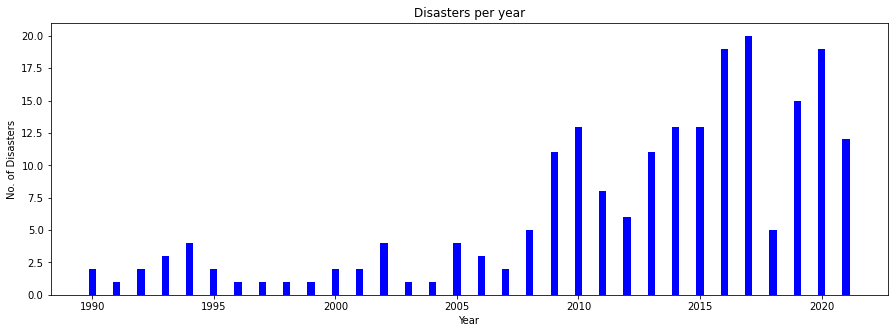

In [ ]:
df_count = df.groupby('Year').count()

Years = list(df_count.index)
Counts = list(df_count['Title'])
  
fig = plt.figure(figsize = (15, 5))

plt.bar(Years, Counts, color ='blue',
        width = 0.3)
 
plt.xlabel("Year")
plt.ylabel("No. of Disasters")
plt.title("Disasters per year")
plt.show()

Looks like disasters are increasing almost constantly.

Mainly due to climate change and increasing human population

In [ ]:
data_count = df.groupby('Year').count() #By using groupby fun we can split the data
print(data_count)

      Title  Duration  Disaster_Info  Date
Year                                      
1990      2         2              2     2
1991      1         1              1     1
1992      2         2              2     2
1993      3         3              3     3
1994      4         4              4     4
1995      2         2              2     2
1996      1         1              1     1
1997      1         1              1     1
1998      1         1              1     1
1999      1         1              1     1
2000      2         2              2     2
2001      2         2              2     2
2002      4         4              4     4
2003      1         1              1     1
2004      1         1              1     1
2005      4         4              4     4
2006      3         3              3     3
2007      2         2              2     2
2008      5         5              5     5
2009     11        11             11    11
2010     13        13             13    13
2011      8

In [ ]:
Year = data_count.index
print(list(Year))

[1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]


In [ ]:
Disaster_count = data_count['Disaster_Info']
print(list(Disaster_count))

[2, 1, 2, 3, 4, 2, 1, 1, 1, 1, 2, 2, 4, 1, 1, 4, 3, 2, 5, 11, 13, 8, 6, 11, 13, 13, 19, 20, 5, 15, 19, 12]


## Earthquakes

In [ ]:
Earthquake_df = get_df(['earthquake','earthquakes'])

Earthquake_df.head()

,Title,Duration,Year,Disaster_Info,Date
0,1991 Uttarkashi earthquake,20 October,1991,the uttarkashi earthquake also known as the g...,1991-10-20
1,1993 Latur earthquake,30 September,1993,the latur earthquake struck india at am loca...,1993-09-30
2,2001 Gujarat earthquake,26 January,2001,the gujarat earthquake also known as the bhuj...,2001-01-26
3,Effect of the 2004 Indian Ocean earthquake on ...,26 December,2004,according to official estimates in india peop...,2004-12-26
4,Andaman Islands earthquake,August 11,2009,the andaman islands earthquake occurred on au...,2009-08-11


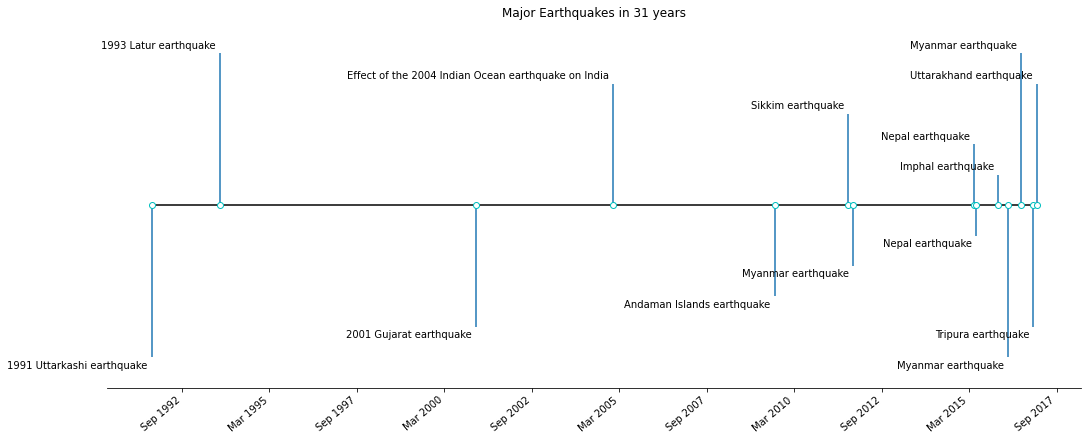

In [ ]:
names,date = get_names_dates(Earthquake_df)

title = "Major Earthquakes in 31 years"

plot_time_data(names,date,title)

## Floods

In [ ]:
Flood_df = get_df(['flood','floods'])

Flood_df.head()

,Title,Duration,Year,Disaster_Info,Date
0,1992 India–Pakistan floods,7 September,1992,the india–pakistan floods was a deadliest flo...,1992-09-07
1,1993 India floods,7 July,1993,the india floods was a deadliest flood caused...,1993-07-07
2,Maharashtra floods of 2005,26 July,2005,the maharashtra floods impacted many parts of...,2005-07-26
3,2006 Surat flood,7–10 August,2006,the surat flood occurred over – august which...,2006-08-10
4,2007 South Asian floods,10 August,2007,the south asian floods were a series of terri...,2007-08-10


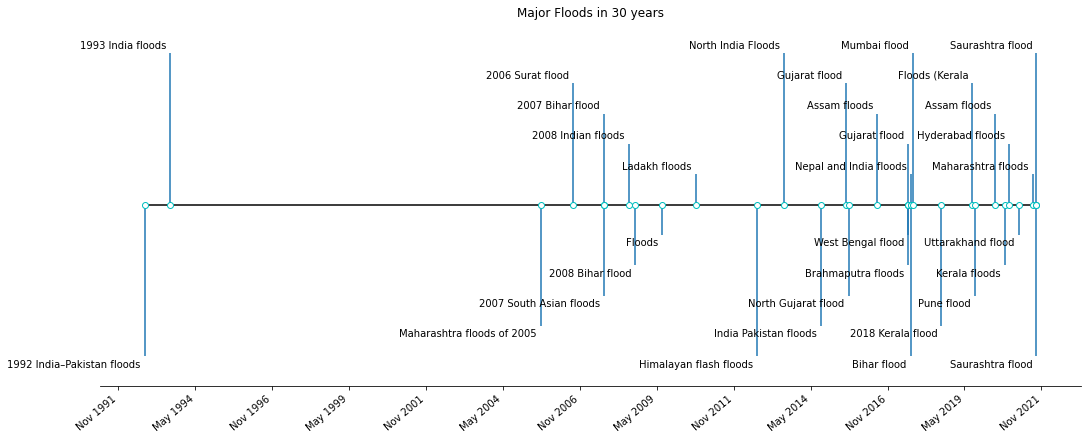

In [ ]:
names,date = get_names_dates(Flood_df)

title = "Major Floods in 30 years"

plot_time_data(names,date,title)


Let’s have a look at the text data

In [ ]:
df['Disaster_Info'][0]

'the  andhra pradesh cyclone or the  machilipatnam cyclone was the worst disaster to affect southern india since the  andhra pradesh cyclone the system was first noted as a depression on  may  while it was located over the bay of bengal about \xa0km \xa0mi to the southeast of chennai india during the next day the depression intensified into a cyclonic storm and started to intensify rapidly becoming a super cyclonic storm early on  may the cyclone weakened slightly before it made landfall on india about \xa0km \xa0mi to the north of madras in the andhra pradesh state as a very severe cyclonic storm with winds of \xa0kmh \xa0mph while over land the cyclone gradually dissipated the cyclone had a severe impact on india with over  people reported to have been killed over  animals also died in the cyclone with the total cost of damages to crops estimated at over \xa0million  usdon  may  the india meteorological department imd reported that a depression had developed over the bay of bengal ab

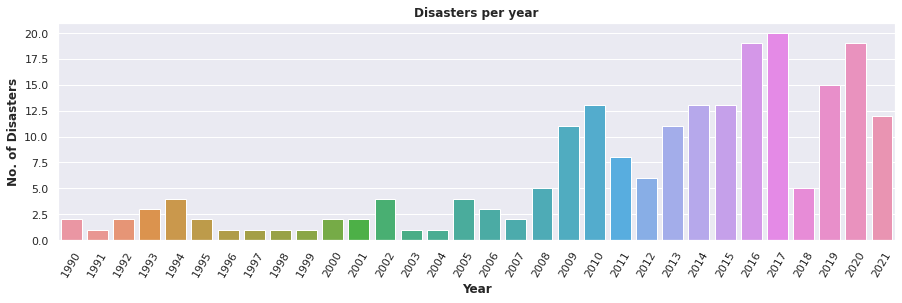

In [ ]:
fig = plt.figure(figsize = (15, 4))
sns.set_theme()
sns.barplot(x=Year,y = Disaster_count)
plt.xlabel("Year",fontweight = 'bold')
plt.ylabel("No. of Disasters",fontweight = 'bold')
plt.title("Disasters per year",fontweight = 'bold')
plt.xticks(rotation=60)
plt.show()

### We can see year of 2017 has more number of disaster (200)